# Input and Output Variable

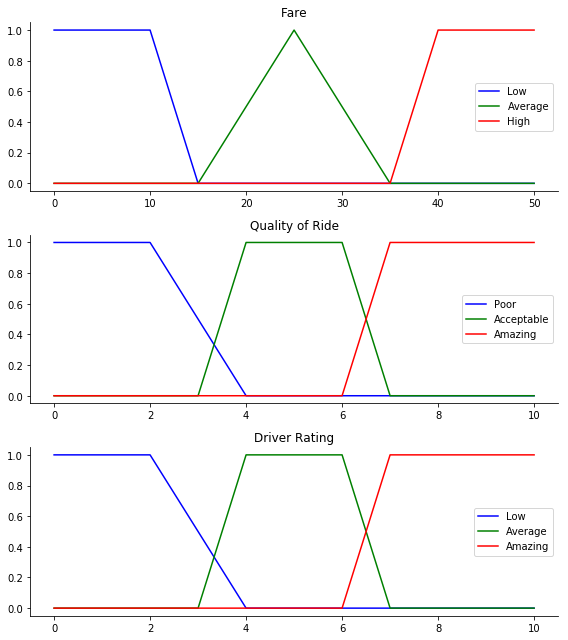

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_fare = np.arange(0, 55, 5)
x_quality = np.arange(0, 11, 1)
x_rating  = np.arange(0, 11, 1)

# Generate fuzzy membership functions
fare_lo = fuzz.trapmf(x_fare, [0, 0, 10,15])
fare_md = fuzz.trimf(x_fare, [15, 25, 35])
fare_hi = fuzz.trapmf(x_fare, [35, 40, 50,50])
qual_lo = fuzz.trapmf(x_quality, [0, 0, 2,4])
qual_md = fuzz.trapmf(x_quality, [3, 4,6, 7])
qual_hi = fuzz.trapmf(x_quality, [6, 7, 10,10])
rating_lo = fuzz.trapmf(x_rating, [0, 0, 2,4])
rating_md = fuzz.trapmf(x_rating, [3, 4,6,7])
rating_hi = fuzz.trapmf(x_rating, [6, 7, 10,10])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_fare, fare_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_fare, fare_md, 'g', linewidth=1.5, label='Average')
ax0.plot(x_fare, fare_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Fare')
ax0.legend()

ax1.plot(x_quality, qual_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_quality, qual_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_quality, qual_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Quality of Ride')
ax1.legend()

ax2.plot(x_rating, rating_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_rating, rating_md, 'g', linewidth=1.5, label='Average')
ax2.plot(x_rating, rating_hi, 'r', linewidth=1.5, label='Amazing')
ax2.set_title('Driver Rating')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Rule

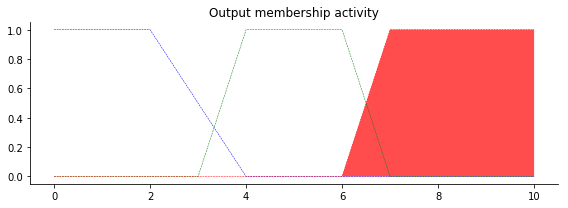

In [2]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
fare_level_lo = fuzz.interp_membership(x_fare, fare_lo, 33.2)
fare_level_md = fuzz.interp_membership(x_fare, fare_md, 33.2)
fare_level_hi = fuzz.interp_membership(x_fare, fare_hi, 33.2)

qual_level_lo = fuzz.interp_membership(x_quality, qual_lo, 7.8)
qual_level_md = fuzz.interp_membership(x_quality, qual_md, 7.8)
qual_level_hi = fuzz.interp_membership(x_quality, qual_hi, 7.8)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(fare_level_lo, qual_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
rate_activation_lo = np.fmin(active_rule1, rating_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
rate_activation_md = np.fmin(qual_level_md, rating_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, fare_level_hi)
rate_activation_hi = np.fmin(active_rule3, rating_hi)
rate0 = np.zeros_like(x_rating)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_rating, rate0, rate_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_rating, rating_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_rating, rate0, rate_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_rating, rating_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_rating, rate0, rate_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_rating, rating_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Defuzzification

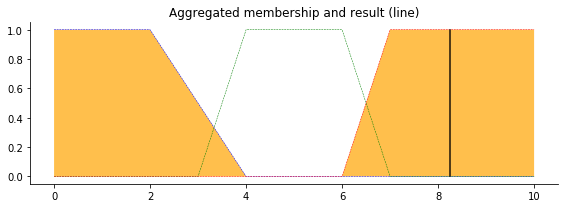

In [3]:
# Aggregate all three output membership functions together
aggregated = np.fmax(rate_activation_lo,
                     np.fmax(rate_activation_md, rate_activation_hi))

# Calculate defuzzified result
rate = fuzz.defuzz(x_rating, aggregated, 'centroid')
rate_activation = fuzz.interp_membership(x_rating, aggregated, rate)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_rating, rating_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_rating, rating_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_rating, rating_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_rating, rating_lo, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([rate, rate], [0, rate_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Summary
